In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons, make_classification

In [383]:
%load_ext sql
import pandas as pd

df = pd.read_csv('avocado.csv')
df

The sql module is not an IPython extension.


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [384]:
# Supongamos que estas son las columnas numéricas en el CSV
nuevos_nombres = {
    "4046": "categoria_a",
    "4225": "categoria_b",
    "4770": "categoria_c"
}

# Renombrar en el df
df.rename(columns=nuevos_nombres, inplace=True)


In [385]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,categoria_a,categoria_b,categoria_c,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [386]:
df.columns = [col.lower().replace('%', '').strip().replace(' ', '_') for col in df.columns]
df.columns

Index(['unnamed:_0', 'date', 'averageprice', 'total_volume', 'categoria_a',
       'categoria_b', 'categoria_c', 'total_bags', 'small_bags', 'large_bags',
       'xlarge_bags', 'type', 'year', 'region'],
      dtype='object')

In [387]:
df_snow = df.copy()
df

,unnamed:_0,date,averageprice,total_volume,categoria_a,categoria_b,categoria_c,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [388]:
print(df_snow.columns.tolist())

['unnamed:_0', 'date', 'averageprice', 'total_volume', 'categoria_a', 'categoria_b', 'categoria_c', 'total_bags', 'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year', 'region']


In [389]:
df_snow.type.unique()

array(['conventional', 'organic'], dtype=object)

In [390]:
dim_type = df[['type']].drop_duplicates().reset_index(drop=True)

# Asignar el código deseado a cada tipo
mapeo_tipo = {
    'conventional': 'TYC',
    'organic': 'TYO'
}

# Crear la columna type_id con los valores mapeados
dim_type['type_id'] = dim_type['type'].map(mapeo_tipo)

dim_type

,type,type_id
0,conventional,TYC
1,organic,TYO


In [391]:
df_snow

,unnamed:_0,date,averageprice,total_volume,categoria_a,categoria_b,categoria_c,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


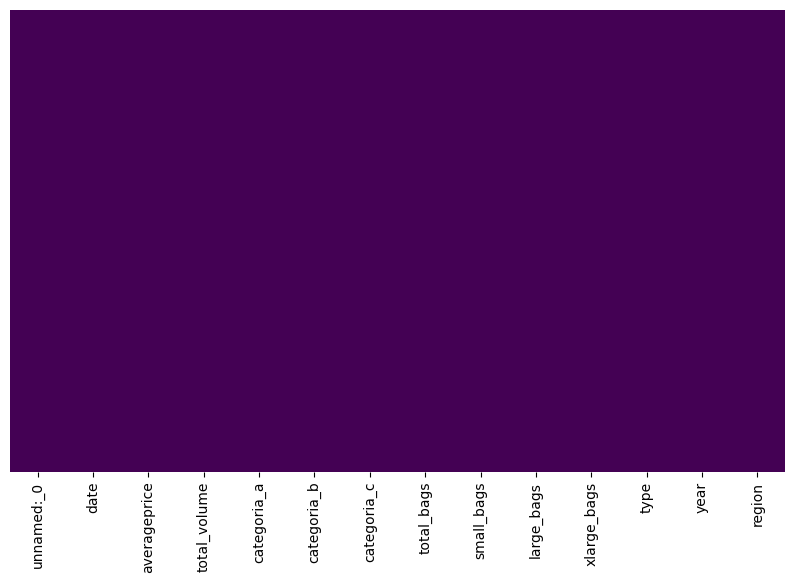

In [392]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

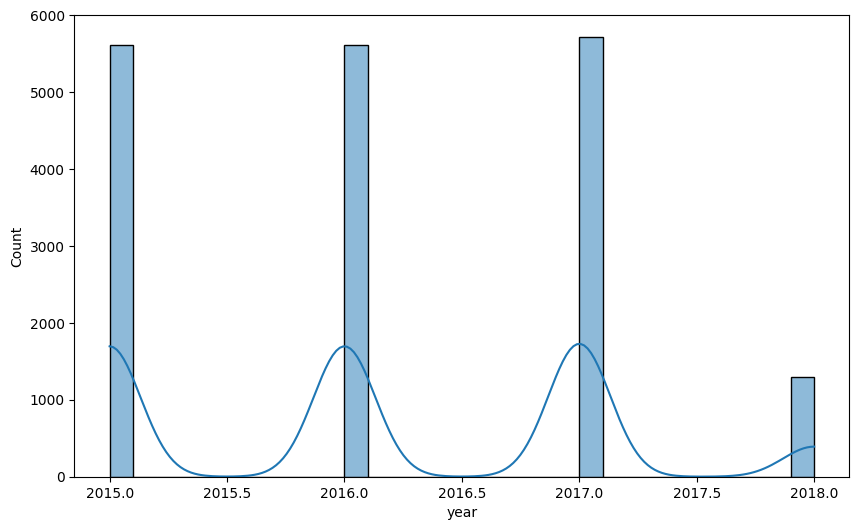

In [393]:
plt.figure(figsize=(10,6))
sns.histplot(df['year'].dropna(), kde=True, bins=30)
plt.show()

C:\Users\Laura Peñaloza\AppData\Local\Temp\ipykernel_4628\2484089343.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='year', y='averageprice', palette='coolwarm')


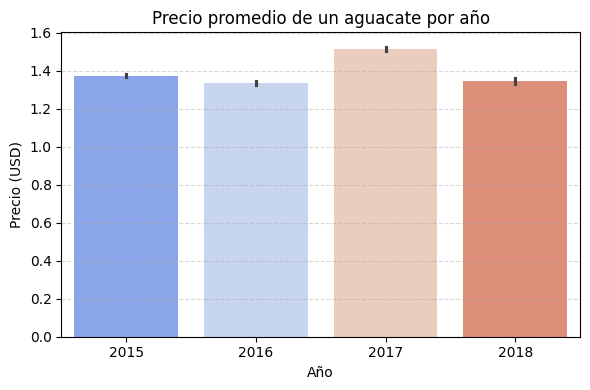

In [394]:
# precio promedio por año 
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='year', y='averageprice', palette='coolwarm')

plt.title('Precio promedio de un aguacate por año')
plt.ylabel('Precio (USD)')
plt.xlabel('Año')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

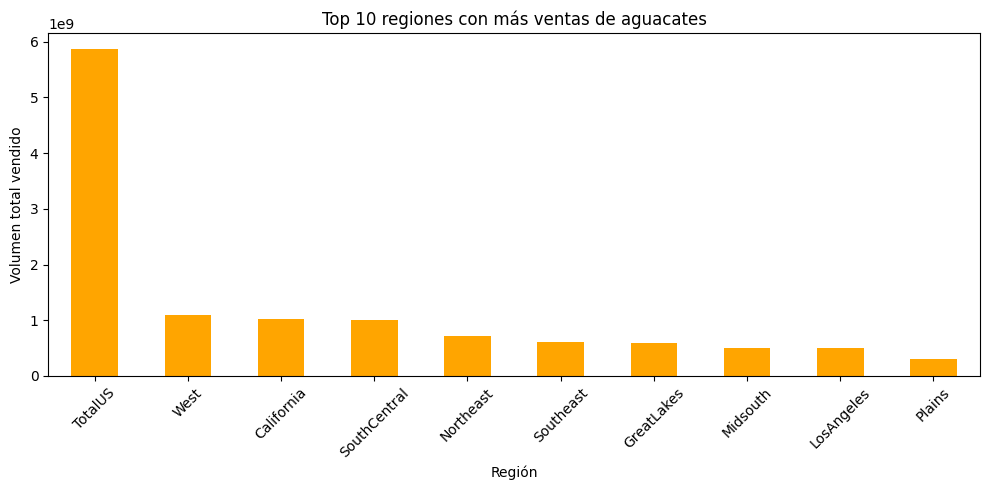

In [395]:
# Agrupar por región y sumar el volumen
ventas_region = df.groupby('region')['total_volume'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
ventas_region.plot(kind='bar', color='orange')

plt.title('Top 10 regiones con más ventas de aguacates')
plt.ylabel('Volumen total vendido')
plt.xlabel('Región')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Laura Peñaloza\AppData\Local\Temp\ipykernel_4628\1327301682.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_mensual = df.set_index('date').resample('M')['total_volume'].sum()


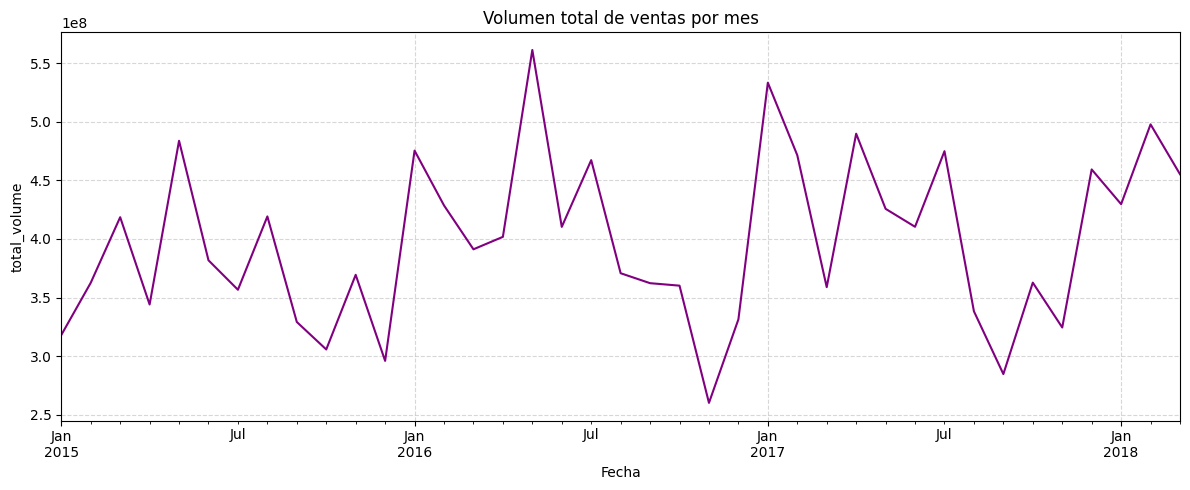

In [396]:
# Asegúrate que la columna Date sea datetime
df['date'] = pd.to_datetime(df['date'])
df_mensual = df.set_index('date').resample('M')['total_volume'].sum()

plt.figure(figsize=(12,5))
df_mensual.plot(color='purple')

plt.title('Volumen total de ventas por mes')
plt.ylabel('total_volume')
plt.xlabel('Fecha')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


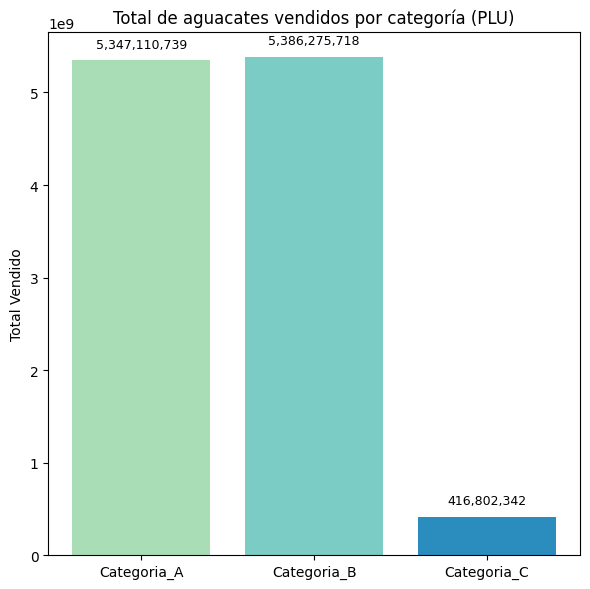

In [397]:
df_plu = df[['categoria_a', 'categoria_b', 'categoria_c']].sum()
df_plu.index = ['Categoria_A', 'Categoria_B', 'Categoria_C']

plt.figure(figsize=(6,6))
bars = plt.bar(df_plu.index, df_plu.values, color=['#a8ddb5','#7bccc4','#2b8cbe'])

# Añadir valores numéricos sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1e8, f'{yval:,.0f}', ha='center', va='bottom', fontsize=9)

plt.title('Total de aguacates vendidos por categoría (PLU)')
plt.ylabel('Total Vendido')
plt.tight_layout()
plt.show()



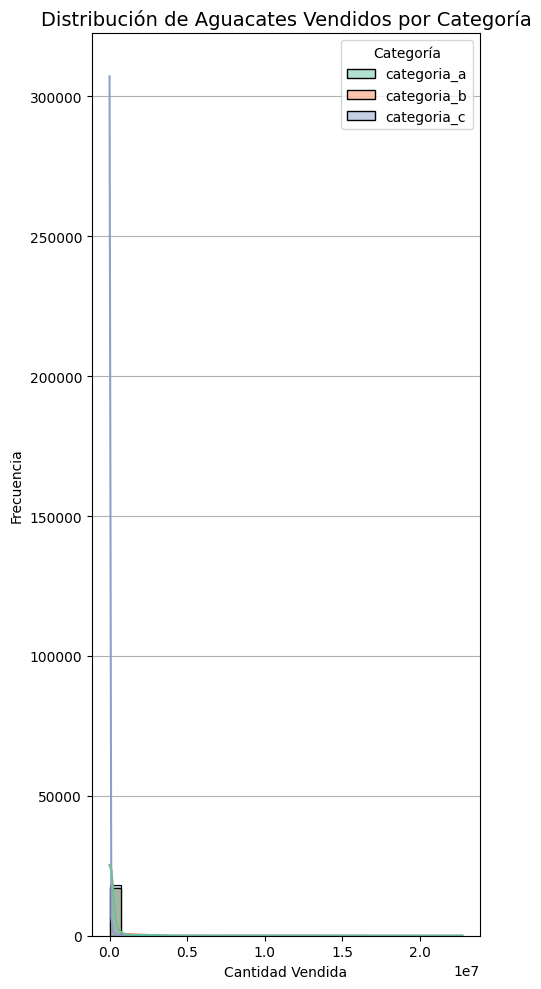

In [398]:
# Primero organizamos los datos en formato largo (long format)
df_melt = df.melt(value_vars=['categoria_a', 'categoria_b', 'categoria_c'], 
                  var_name='Categoría', 
                  value_name='Cantidad Vendida')

# Creamos el histograma
plt.figure(figsize=(5,10))
sns.histplot(data=df_melt, x='Cantidad Vendida', hue='Categoría', bins=30, kde=True, palette='Set2')

# Títulos y etiquetas
plt.title("Distribución de Aguacates Vendidos por Categoría", fontsize=14)
plt.xlabel("Cantidad Vendida")
plt.ylabel("Frecuencia")
plt.grid(axis='y')

# Mostrar
plt.tight_layout()
plt.show()


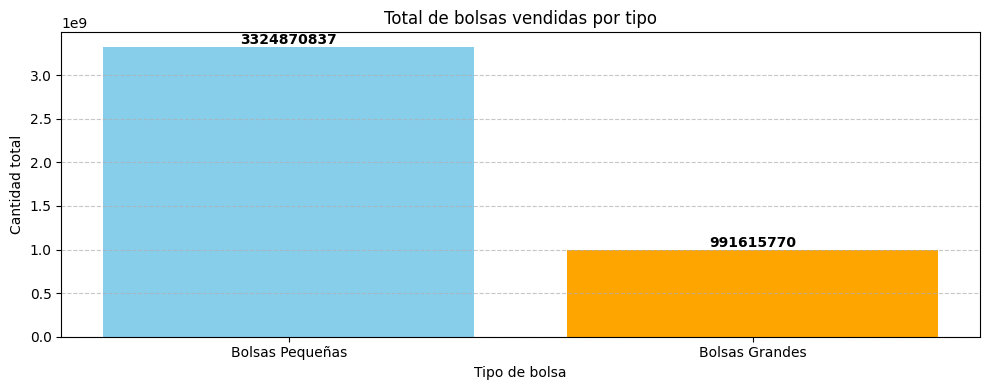

In [399]:

# Sumar el total de bolsas pequeñas y grandes
total_small = df_snow["small_bags"].sum()
total_large = df_snow["large_bags"].sum()

# Crear un DataFrame con los totales
totales = pd.DataFrame({
    "tipo_bolsa": ["Bolsas Pequeñas", "Bolsas Grandes"],
    "cantidad": [total_small, total_large]
})

# Crear el gráfico de barras
plt.figure(figsize=(10, 4))
bars = plt.bar(totales["tipo_bolsa"], totales["cantidad"], color=["skyblue", "orange"])

# Añadir los valores encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, f'{int(yval)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Añadir títulos y etiquetas
plt.title("Total de bolsas vendidas por tipo")
plt.xlabel("Tipo de bolsa")
plt.ylabel("Cantidad total")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [400]:
print(df.columns)


Index(['unnamed:_0', 'date', 'averageprice', 'total_volume', 'categoria_a',
       'categoria_b', 'categoria_c', 'total_bags', 'small_bags', 'large_bags',
       'xlarge_bags', 'type', 'year', 'region'],
      dtype='object')


C:\Users\Laura Peñaloza\AppData\Local\Temp\ipykernel_4628\1233375318.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_volume'].fillna(df['total_volume'].median(), inplace=True)
C:\Users\Laura Peñaloza\AppData\Local\Temp\ipykernel_4628\1233375318.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

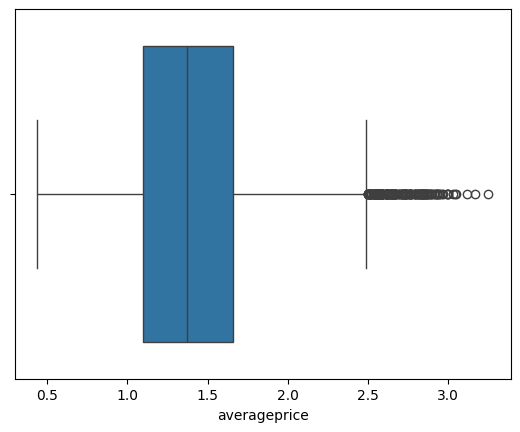

In [401]:
# Eliminación de duplicados
df = df.drop_duplicates()

# Tratamiento de valores nulos
df.isnull().sum()  # Para identificar las columnas con nulos

# Ejemplo de solución:
# Si es numérica:
df['total_volume'].fillna(df['total_volume'].median(), inplace=True)

# Si es categórica:
df['region'].fillna(df['region'].mode()[0], inplace=True)

# Detección y tratamiento de outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='averageprice')
plt.show()

# Filtrar o transformar outliers (por ejemplo eliminando si son muy extremos):
q1 = df['averageprice'].quantile(0.25)
q3 = df['averageprice'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['averageprice'] >= lower_bound) & (df['averageprice'] <= upper_bound)]

# Conversión de variables categóricas a dummies
df = pd.get_dummies(df, drop_first=True)

# Normalización y estandarización
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [402]:
df_snow

,unnamed:_0,date,averageprice,total_volume,categoria_a,categoria_b,categoria_c,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [403]:

# Solo columnas numéricas
num_df = df.select_dtypes(include=np.number)


z_scores = np.abs(stats.zscore(num_df, nan_policy='omit'))

# Umbral es 3
outliers = (z_scores > 3)

# Ver cuántos outliers hay por columna
outliers.sum(axis=0)


#matar outliers
df_cleaned = df[(z_scores <= 3).all(axis=1)]


#transformar date
df_snow['date'] = pd.to_datetime(df_snow['date'])  # convertir si aún no es datetime
df_snow['month'] = df_snow['date'].dt.month
df_snow[['date', 'month']].head()

,date,month
0,2015-12-27,12
1,2015-12-20,12
2,2015-12-13,12
3,2015-12-06,12
4,2015-11-29,11


In [404]:
df_snow = pd.get_dummies(df_snow, columns=['type'], drop_first=True)
df_snow['type_organic'] = df_snow['type_organic'].astype(int)

df_grouped = df_snow.groupby(['region', 'year', 'month','type_organic']).mean(numeric_only=True).reset_index()
df_grouped

,region,year,month,type_organic,unnamed:_0,averageprice,total_volume,categoria_a,categoria_b,categoria_c,total_bags,small_bags,large_bags,xlarge_bags
0,Albany,2015,1,0,49.5,1.1725,4.293179e+04,1419.4675,31166.0600,119.2325,10227.0250,9744.3525,482.6725,0.000
1,Albany,2015,1,1,49.5,1.8450,1.197717e+03,29.8275,196.6250,0.0000,971.2650,971.2650,0.0000,0.000
2,Albany,2015,2,0,45.5,1.0275,5.234256e+04,1196.5775,41057.6625,178.9975,9909.3225,9565.9875,343.3350,0.000
3,Albany,2015,2,1,45.5,1.7625,1.333503e+03,23.6400,91.7200,0.0000,1218.1425,1218.1425,0.0000,0.000
4,Albany,2015,3,0,41.0,1.0620,5.065896e+04,1419.5020,39877.5860,134.3020,9227.5740,8852.8580,374.7160,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,WestTexNewMexico,2018,1,1,9.5,1.7825,1.533740e+04,1701.5050,2805.3650,419.8700,10410.6600,10299.8800,110.7800,0.000
4208,WestTexNewMexico,2018,2,0,5.5,0.8200,1.034118e+06,482020.7100,230535.4925,10232.1075,311329.7875,124373.4625,183195.7100,3760.615
4209,WestTexNewMexico,2018,2,1,5.5,1.5825,1.726984e+04,1959.3875,1827.1325,0.0000,13483.3200,13188.9925,294.3275,0.000
4210,WestTexNewMexico,2018,3,0,1.5,0.8850,9.134944e+05,454483.2225,164042.5350,10181.9025,284786.7025,155386.9225,127064.1350,2335.645


In [405]:
# separar X e y
# Definir variables predictoras (X) y variable objetivo (y)
X = df_grouped.drop(columns=['averageprice'])
y = df_grouped['averageprice']

# la region ahora seran numeros
# Convertir la columna 'region' a variables dummy
X = pd.get_dummies(X, columns=['region'], drop_first=True)

#normalizar x
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Separar en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo con X_train y y_train
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Crear DataFrame con los resultados
df_pred = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Error': y_test - y_pred
})

# Calcular el porcentaje de error
df_pred['porcentaje'] = (abs(df_pred['Error']) / df_pred['Actual']) * 100

# Asegurarnos que los valores negativos de Error sean positivos (ya lo hicimos con abs en Percentage_Error)
df_pred['Error'] = abs(df_pred['Error'])

# Mostrar la tabla con los resultados
df_pred

,Actual,Predicted,Error,porcentaje
643,1.7175,1.798547,0.081047,4.718911
166,1.1650,1.211106,0.046106,3.957639
1444,0.8175,0.840751,0.023251,2.844099
1877,1.7640,1.543387,0.220613,12.506398
463,1.1900,1.699466,0.509466,42.812300
...,...,...,...,...
3470,1.1175,1.189259,0.071759,6.421386
654,1.1050,1.255221,0.150221,13.594705
2578,0.6600,0.874337,0.214337,32.475336
1551,1.4575,1.737174,0.279674,19.188622


In [406]:

df_pred.describe()

,Actual,Predicted,Error,porcentaje
count,843.000000,843.000000,843.000000,843.000000
mean,1.398749,1.402477,0.172834,12.956105
std,0.386176,0.310547,0.148418,11.686914
min,0.562500,0.689087,0.000070,0.006139
25%,1.103250,1.150612,0.066743,4.670543
50%,1.357500,1.395278,0.140351,10.028797
75%,1.647750,1.636086,0.238108,17.374870
max,2.982500,2.245128,1.152676,78.041506


In [407]:
# Selección de variables
features = ['averageprice', 'total_volume', 'categoria_a', 'categoria_b', 'categoria_c']
X = df_snow[features]

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

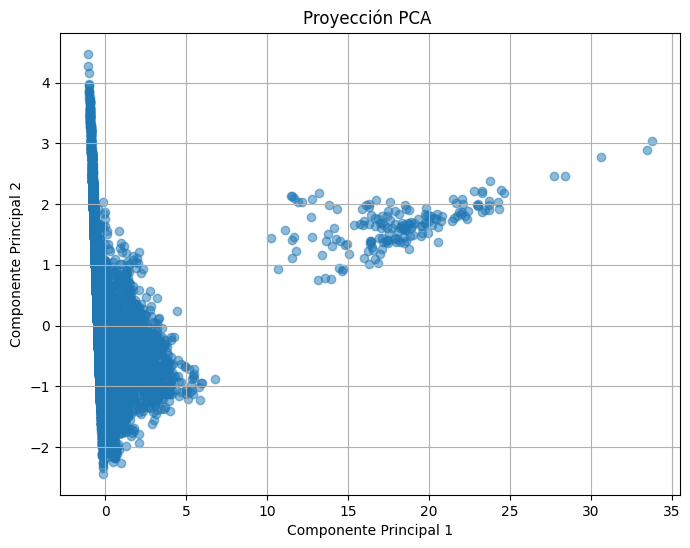

In [408]:
# Gráfico PCA 
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('Proyección PCA ')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

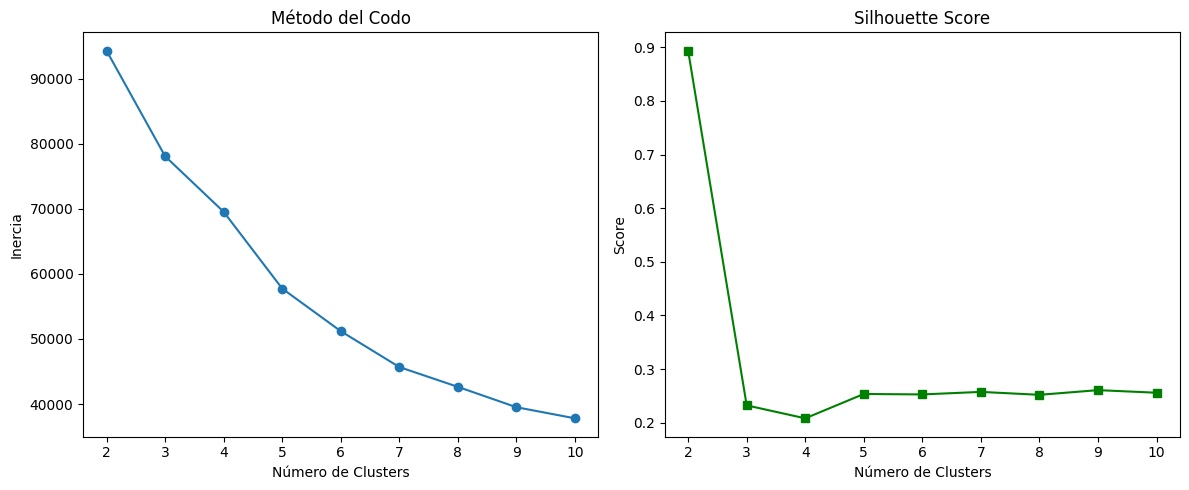

In [409]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Selección de variables numéricas para clustering
X = df.select_dtypes(include=['float64', 'int64'])

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método del codo para determinar número óptimo de clusters
inertias = []
silhouettes = []

for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertias.append(model.inertia_)
    labels = model.predict(X_scaled)
    silhouettes.append(silhouette_score(X_scaled, labels))

# Gráfica de codo
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(2,11), inertias, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')

# Gráfica de Silhouette Score
plt.subplot(1,2,2)
plt.plot(range(2,11), silhouettes, marker='s', color='green')
plt.title('Silhouette Score')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


In [410]:
# Supongamos que elegimos 3 clusters
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Validar con Silhouette
print(f'Silhouette Score con {optimal_k} clusters: {silhouette_score(X_scaled, df["Cluster"]):.4f}')

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='Set1', s=60, alpha=0.7)
plt.title(f'Clusters encontrados con KMeans (k={optimal_k})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


KeyboardInterrupt: 